In [1]:
import numpy as np 
import cv2
import sys
import matplotlib.pyplot as plt 
import ipywidgets.widgets as widgets
from jetbot import Robot, bgr8_to_jpeg
from camera_custom import Camera_Custom
import traitlets
from visual_odometry import PinholeCamera, VisualOdometry
from IPython.display import clear_output
import time

In [2]:
image = widgets.Image(format='jpeg', width=640, height=480)
camera = Camera_Custom.instance(width=640, height=480)
#camera_link = traitlets.dlink((camera, 'value'), (image, 'value'), transform=bgr8_to_jpeg)


In [3]:
fs = cv2.FileStorage("./leftcameraparam.yml", cv2.FILE_STORAGE_READ)
K = fs.getNode("K")
D = fs.getNode("D")
ka = K.mat()
Da = D.mat()
print(ka[0,0])
print(D.mat())
cam = PinholeCamera(ka, Da, 480 , 640)

590.7946546549674
[[-0.13632036  0.69565979  0.00348146  0.00175295 -1.11504476]]


In [4]:
vo = VisualOdometry(cam)

2 480 640


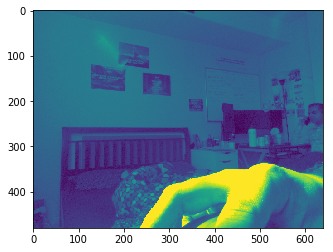

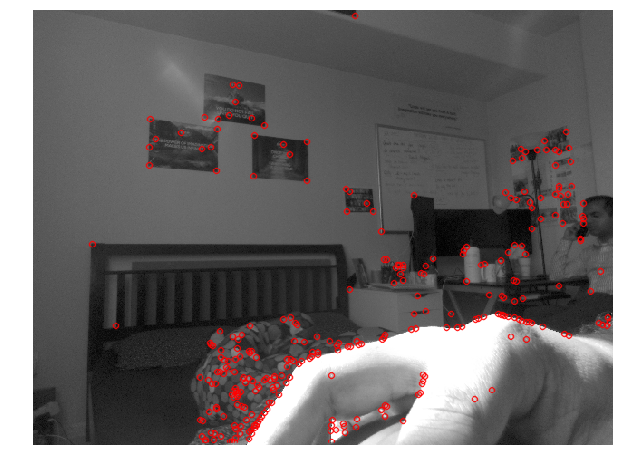

In [5]:
def process_first(change):
    x = change['new'] 
    gray= cv2.cvtColor(x,cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray,(5,5),cv2.BORDER_DEFAULT)
    print(gray.ndim, gray.shape[0] ,  gray.shape[1])
    plt.imshow(gray)
    vo.set_target(gray)

        
process_first({'new': camera.value}) 

2 480 640
default Frame
[[ 9.99999654e-01 -6.29730733e-05  8.29495355e-04]
 [ 6.40305843e-05  9.99999185e-01 -1.27492002e-03]
 [-8.29414394e-04  1.27497269e-03  9.99998843e-01]]
[[0.01726989]
 [0.09759782]
 [0.99507609]]
X = 0.07305059928275512
Y = 0.04752194966451989
Z = 0.0036686835069826224
[[ 4.73940642e-04 -6.97237244e-01  9.04746240e-02]
 [ 6.97250536e-01  4.75857558e-04 -7.52691629e-02]
 [-9.04733360e-02  7.52657654e-02 -1.34195557e-05]]


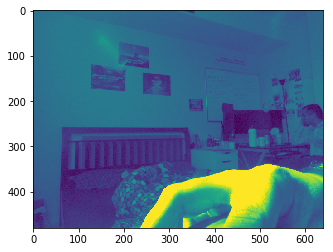

In [7]:
def update(change):
    x = change['new'] 
    gray= cv2.cvtColor(x,cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray,(5,5),cv2.BORDER_DEFAULT)
    print(gray.ndim, gray.shape[0] ,  gray.shape[1])
    plt.imshow(gray)
    
    x, y, z = vo.update(gray)
    print("X = " + str(x))
    print("Y = " + str(y))
    print("Z = " + str(z))
    time.sleep(0.1)
    print(vo.E)
    #clear_output(wait=True)
        
update({'new': camera.value}) 

In [7]:
camera.observe(update, names='value')

2 480 640
default Frame
[[ 9.99999345e-01 -9.53491902e-04 -6.32592749e-04]
 [ 9.53785293e-04  9.99999438e-01  4.63651716e-04]
 [ 6.32150305e-04 -4.64254771e-04  9.99999692e-01]]
[[-0.07467314]
 [ 0.05770477]
 [ 0.99553708]]
X = -0.026599845245091795
Y = -0.03621954693012816
Z = 0.054647891062043194
2 480 640
default Frame
[[ 9.99997807e-01  4.60970570e-04 -2.04274051e-03]
 [-4.59568473e-04  9.99999659e-01  6.86796488e-04]
 [ 2.04305641e-03 -6.85856203e-04  9.99997678e-01]]
[[ 0.06758236]
 [-0.06129589]
 [ 0.99582902]]
X = -0.03929675089316874
Y = -0.11705859105162696
Z = -0.0263313897767003
2 480 640
default Frame
[[ 9.99999906e-01  1.32191987e-04  4.12248589e-04]
 [-1.32062879e-04  9.99999942e-01 -3.13192904e-04]
 [-4.12289967e-04  3.13138432e-04  9.99999866e-01]]
[[ 0.20170073]
 [-0.2672294 ]
 [-0.94228725]]
X = 0.01794151237701004
Y = 0.023622475718806345
Z = -0.007566646253280152
2 480 640
default Frame
[[ 9.99995329e-01 -1.14528905e-04 -3.05416339e-03]
 [ 1.03591184e-04  9.9999358

In [8]:
plt.close()

[[ 9.99994540e-01 -3.26180591e-03 -5.29953605e-04]
 [ 3.26192680e-03  9.99994654e-01  2.27406776e-04]
 [ 5.29209015e-04 -2.29134204e-04  9.99999834e-01]]
[[ 0.19112082]
 [-0.07499192]
 [-0.97869763]]
X = -0.01312842478758085
Y = -0.030321444442710222
Z = 0.18689499624047623
2 480 640
default Frame
[[ 9.99999745e-01 -1.43581896e-04  6.99571003e-04]
 [ 1.43549767e-04  9.99999989e-01  4.59768061e-05]
 [-6.99577597e-04 -4.58763711e-05  9.99999754e-01]]
[[-0.98746632]
 [ 0.15766548]
 [ 0.00720151]]
X = -0.002628523086172789
Y = 0.04008284701171198
Z = 0.00822479781588508
2 480 640
default Frame
[[ 9.99997879e-01  5.10271136e-04 -1.99555285e-03]
 [-5.10060246e-04  9.99999864e-01  1.06187924e-04]
 [ 1.99560677e-03 -1.05169846e-04  9.99998003e-01]]
[[-0.8539145 ]
 [ 0.05549324]
 [-0.51744617]]
X = -0.006025800328103389
Y = -0.11433992121299698
Z = -0.029224358825931638
2 480 640
default Frame
[[ 9.99999966e-01 -2.58864993e-04 -3.24549394e-05]
 [ 2.58871473e-04  9.99999947e-01  1.99810015e-04]


In [8]:
camera.stop()